In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:/Users/Sinch/OneDrive/Desktop/Datasets/advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
# Number of rows and columns
df.shape

(200, 4)

In [6]:
# Checking for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Data Preprocessing

In [8]:
# To convert the Dtype to int
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['TV']=le.fit_transform(df['TV'])
df['Radio']=le.fit_transform(df['Radio'])
df['Newspaper']=le.fit_transform(df['Newspaper'])
df['Sales']=le.fit_transform(df['Sales'])
df.info()

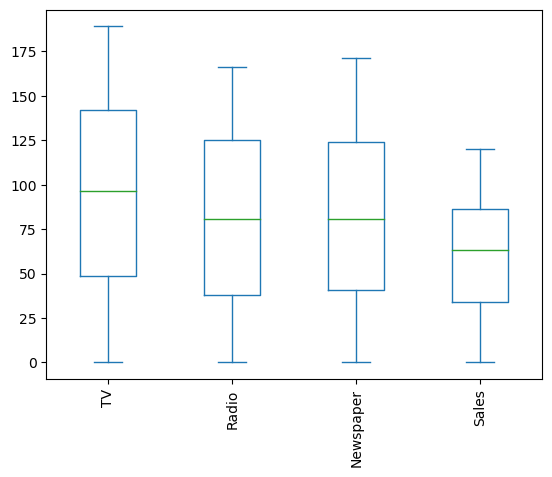

In [10]:
# Checkout for Outliers and Handling them
df.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

In [11]:
# Vertical split
X = df.drop('Sales', axis=1)
y = df['Sales']


In [12]:
# Horizontal split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [13]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (160, 3)
X_test shape: (40, 3)
y_train shape: (160,)
y_test shape: (40,)


# Linear Regression

In [14]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#fitting the model
lr.fit(X_train,y_train)
print("Training completed")

Training completed


In [15]:
#Training and Testing score
print("Training score: ",lr.score(X_train,y_train))
print("Testing score: ",lr.score(X_test,y_test))

Training score:  0.9130742618034472
Testing score:  0.8337947935192591


In [16]:
#Accuracy
print("accuracy",lr.score(X,y)*100)

accuracy 90.13243693440332


In [17]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

In [18]:
pred=lr.predict(X_test)
pred

array([ 62.88683599,  29.95162133,  18.11631066,  82.33675059,
        76.92879325,  69.70016836,  20.45042801, 103.70241103,
        43.03385231,  96.54470504,  26.13323303,  90.49446911,
        34.94190118,  21.35533087,  74.60652018,  29.82687359,
        20.90046181,  73.0583455 ,  77.5279889 ,  82.80380078,
        85.87272827,  88.13124713,  35.13832351,  32.89607026,
        79.32790062,  54.82984948,  67.08662769,  24.36126585,
        84.00351258,  74.37117796,  89.63991172,  66.24148747,
        62.80592064,  52.880392  ,  14.99318133,  41.7775825 ,
       101.92234733, 101.63940314,  88.0517452 ,  83.93905002])

In [19]:
y_test=y_test.ravel()
pred=pred.ravel()
act=pd.DataFrame({'Actual':y_test,'Predicted':pred})
act.head()

,Actual,Predicted
0,72,62.886836
1,29,29.951621
2,19,18.116311
3,84,82.336751
4,89,76.928793


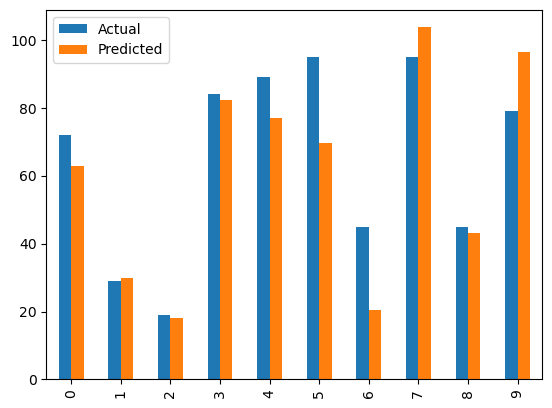

In [20]:
act.head(10).plot(kind='bar')
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
#evaluation metrics
mse=mean_squared_error(y_test,pred)
rmse=np.sqrt(y_test,pred)
print("MAE = ",mean_absolute_error(y_test,pred))
print("RMSE = ",rmse)
print("R2_Score = ",r2_score(y_test,pred))

MAE =  54.96135330919414
RMSE =  [ 8.48528137  5.38516481  4.35889894  9.16515139  9.43398113  9.74679434
  6.70820393  9.74679434  6.70820393  8.88819442  4.58257569  9.38083152
  7.14142843  2.82842712  8.1240384   6.32455532  4.24264069  8.1240384
 10.          9.2736185   9.79795897  8.42614977  6.164414    5.65685425
  8.36660027  8.24621125  8.          5.91607978  9.53939201  8.18535277
  8.30662386  7.93725393  7.81024968  6.8556546   1.73205081  6.55743852
 10.77032961  9.74679434  8.83176087 10.04987562]
R2_Score =  -3.701751318457025
